            Sales Product Region
Date                            
2024-01-01    150       A  North
2024-01-02    200       B  South
2024-01-03    180       A  North
2024-01-04    220       C   East
2024-01-05    160       A   West

Missing Values:
Sales      0
Product    0
Region     0
dtype: int64


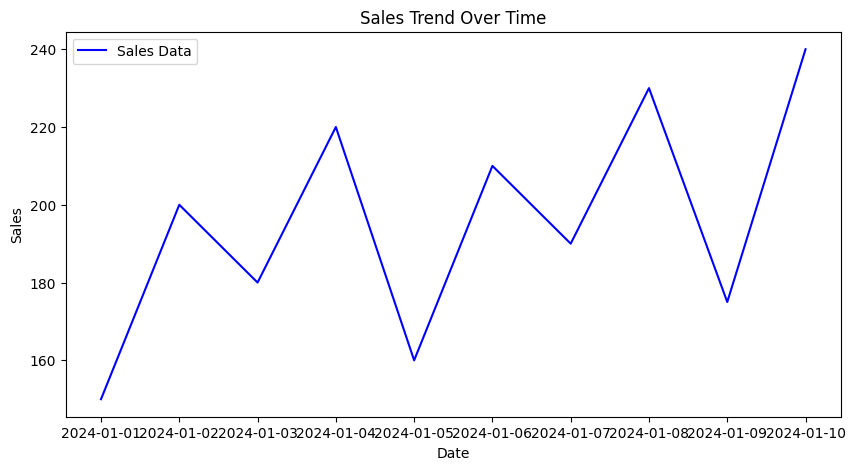

ADF Statistic: 1.8965715852415581
P-Value: 0.9985224831326911
The data is non-stationary. Differencing is needed.
Forecasted Sales for next 10 periods:
 2024-01-11    240.000047
2024-01-12    240.000038
2024-01-13    240.000038
2024-01-14    240.000038
2024-01-15    240.000038
2024-01-16    240.000038
2024-01-17    240.000038
2024-01-18    240.000038
2024-01-19    240.000038
2024-01-20    240.000038
Freq: D, Name: predicted_mean, dtype: float64


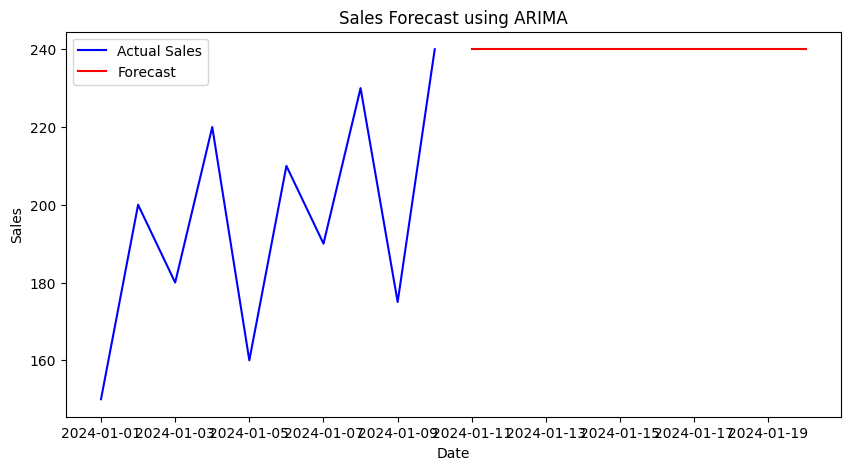

In [3]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import warnings
warnings.filterwarnings("ignore")

#load and inspect dataset
df=pd.read_csv('sales_data_.csv',parse_dates=['Date'],index_col='Date')
df = df.asfreq('D')

#display first few rows
print(df.head())

#check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

#visualize sales trends
#plot sales over time
plt.figure(figsize=(10,5))
plt.plot(df.index,df['Sales'],label="Sales Data",color='blue')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Trend Over Time')
plt.legend()
plt.show()

#Check Stationarity (Dickey-Fuller Test)
from statsmodels.tsa.stattools import adfuller

#Perform Dickey-Fuller Test
result=adfuller(df['Sales'])
print(f"ADF Statistic: {result[0]}")
print(f"P-Value: {result[1]}")

if result[1]>0.05:
    print("The data is non-stationary. Differencing is needed.")
else:
    print("The data is stationary.")

#build ARIMA Model
#Fit ARIMA Model (assuming p=2,d=1,q=2 based on ACF/PACF)
model=ARIMA(df['Sales'],order=(2,1,2))
model_fit=model.fit()

#forecast next 10 periods
forecast=model_fit.forecast(steps=10)
print("Forecasted Sales for next 10 periods:\n",forecast)

#visualize forecast
#plot original and forecasted sales
plt.figure(figsize=(10,5))
plt.plot(df.index,df['Sales'],label="Actual Sales",color='blue')
plt.plot(pd.date_range(start=df.index[-1],periods=11,freq='D')[1:],forecast,label="Forecast",color='red')
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Sales Forecast using ARIMA")
plt.legend()
plt.show()

   Age  Gender  Cholesterol Blood Pressure Heart Disease
0   70    Male          238         138/77            No
1   37    Male          217        148/100            No
2   31    Male          161         136/70            No
3   77  Female          267         137/82            No
4   47    Male          287         116/77           Yes

Missing Values:
Age               0
Gender            0
Cholesterol       0
Blood Pressure    0
Heart Disease     0
dtype: int64
Training samples: 16, Testing samples: 4
Model Accuracy: 0.25

Confusion Matrix:
[[1 3]
 [0 0]]

Classification Report:
              precision    recall  f1-score   support

          No       1.00      0.25      0.40         4
         Yes       0.00      0.00      0.00         0

    accuracy                           0.25         4
   macro avg       0.50      0.12      0.20         4
weighted avg       1.00      0.25      0.40         4



C:\Users\aroma\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\aroma\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\aroma\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

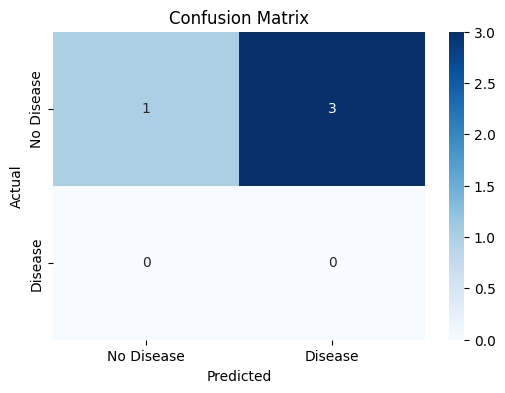

In [3]:
# Step 1: Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset (Assuming 'heart_disease.csv' with medical features)
df = pd.read_csv("heart_disease.csv")

# Display first few rows
print(df.head())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Step 3: Preprocess Data

# Define features (X) and target variable (y)
X = df.drop(columns=['Heart Disease'])
y = df['Heart Disease']

X = pd.get_dummies(X, drop_first=True)

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")

# Step 4: Train Logistic Regression Model

# Train Logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
      
# Step 5: Evaluate Model Performance

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
